# Data Characterization - mp3s
Tristan Miller, 9/17/2019

Naturally I have not included the mp3 data in this repository, but I will say a bit here.  Out of the 1108 songs I have chord files for, only 952 are actually unique (the McGill Billboard project includes some duplicates because they selected tracks with replacement).  Of these, I was able to acquire 837 corresponding mp3s.  The length of the mp3s do not always match the length indicated in the chord files; I tossed mp3s that were at least 10 seconds longer or shorter.  The difference in time length will be noted in `song_directory.csv` as a measure of data quality (and possible issues with music shifting).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Modifying-song_directory" data-toc-modified-id="Modifying-song_directory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modifying song_directory</a></span></li><li><span><a href="#Characterization" data-toc-modified-id="Characterization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Characterization</a></span></li></ul></div>

## Setup

In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Modifying song_directory

In [13]:
mp3_directory = pd.read_csv('../Data/mp3s/mp3_directory.csv')
song_directory = pd.read_csv('../song_directory.csv')

In [14]:
mp3_directory.head()

,mp3_filepath,mp3_length,chord_length,diff_length
0,Data/mp3s/Money - The Beatles.mp3,2:46,2:47,-1.0
1,Data/mp3s/Not A Second Time - The Beatles.mp3,2:14,2:08,6.0
2,Data/mp3s/Don't Bother Me - The Beatles.mp3,2:32,2:29,3.0
3,Data/mp3s/Little Child - The Beatles.mp3,1:45,1:48,-3.0
4,Data/mp3s/It Won't Be Long - The Beatles.mp3,2:12,2:13,-1.0


In [15]:
song_directory.head()

,dataset,artist,track,chord_filepath
0,isophonics/The Beatles,The Beatles,Money,Data/Isophonics/The Beatles Annotations/chordl...
1,isophonics/The Beatles,The Beatles,Not A Second Time,Data/Isophonics/The Beatles Annotations/chordl...
2,isophonics/The Beatles,The Beatles,Don't Bother Me,Data/Isophonics/The Beatles Annotations/chordl...
3,isophonics/The Beatles,The Beatles,Little Child,Data/Isophonics/The Beatles Annotations/chordl...
4,isophonics/The Beatles,The Beatles,It Won't Be Long,Data/Isophonics/The Beatles Annotations/chordl...


In [16]:
song_directory = pd.concat([song_directory,mp3_directory],axis=1)

In [19]:
song_directory.head()

,dataset,artist,track,chord_filepath,mp3_filepath,mp3_length,chord_length,diff_length
0,isophonics/The Beatles,The Beatles,Money,Data/Isophonics/The Beatles Annotations/chordl...,Data/mp3s/Money - The Beatles.mp3,2:46,2:47,-1.0
1,isophonics/The Beatles,The Beatles,Not A Second Time,Data/Isophonics/The Beatles Annotations/chordl...,Data/mp3s/Not A Second Time - The Beatles.mp3,2:14,2:08,6.0
2,isophonics/The Beatles,The Beatles,Don't Bother Me,Data/Isophonics/The Beatles Annotations/chordl...,Data/mp3s/Don't Bother Me - The Beatles.mp3,2:32,2:29,3.0
3,isophonics/The Beatles,The Beatles,Little Child,Data/Isophonics/The Beatles Annotations/chordl...,Data/mp3s/Little Child - The Beatles.mp3,1:45,1:48,-3.0
4,isophonics/The Beatles,The Beatles,It Won't Be Long,Data/Isophonics/The Beatles Annotations/chordl...,Data/mp3s/It Won't Be Long - The Beatles.mp3,2:12,2:13,-1.0


In [32]:
def mmss_to_s(mmss):
    '''Returns time in seconds, given an mm:ss string'''
    if type(mmss) != str:
        return np.nan
    m = re.match('^(\d+):(\d\d)$',mmss)
    if m:
        return int(m.group(1))*60 + int(m.group(2))
    else:
        return np.nan

In [33]:
song_directory['mp3_length'] = song_directory['mp3_length'].apply(lambda x: mmss_to_s(x) if x else np.nan)
song_directory['chord_length'] = song_directory['chord_length'].apply(lambda x: mmss_to_s(x) if x else np.nan)

In [35]:
song_directory.to_csv('../song_directory.csv',index=False)

## Characterization

In [13]:
song_directory = pd.read_csv('../song_directory.csv')

In [41]:
print('Mean song length:')
print(np.mean(song_directory['mp3_length'].loc[song_directory['mp3_filepath'] != '']))
print('Total length:')
print(np.sum(song_directory['mp3_length'].loc[song_directory['mp3_filepath'] != '']))

Mean song length:
202.6327160493827
Total length:
196959.0


It may be mentioned that the mp3_length may be off a bit, and this is not a precise estimate

In [42]:
print('Standard deviation song length:')
print(np.std(song_directory['mp3_length'].loc[song_directory['mp3_filepath'] != '']))

Standard deviation song length:
63.48469469505473


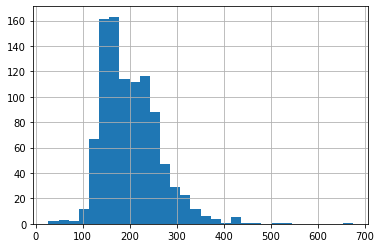

In [47]:
song_directory['mp3_length'].loc[song_directory['mp3_filepath'] != ''].hist(bins=30);